In [66]:
'''
Script to visualize differing clinical outcomes for all clades,
generate multiple pairwise comparisons within the context of the model and
visualize effects of age and comorbidities within the context of the model
'''

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels
from scipy.stats import mannwhitneyu, wilcoxon
import itertools
from sklearn.preprocessing import StandardScaler
from numpy import inf
import math
from statsmodels.stats.multitest import multipletests
from matplotlib.pyplot import cm
from sklearn.cluster import AgglomerativeClustering
import matplotlib.gridspec as gridspec


df = pd.read_csv('/Users/tlh4362/Desktop/final_dataset_analysis_11_2.csv')


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7,9,19,28,29,52,54,58,91,111) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [68]:
outcome = []
for idx in df.index:
    if df.loc[idx, 'ca_death'] == 1:
        outcome.append('Death')
    elif df.loc[idx, 'ICU'] == 1:
        outcome.append('Hospitalized ICU')
    elif df.loc[idx, 'ca_hosp_admit'] == 1 and df.loc[idx, 'ICU']==0:
        outcome.append('Hospitalized non-ICU')
    else:
        outcome.append('Outpatient')

df['clinical_outcome_ME'] = outcome

print(df['clinical_outcome_ME'].value_counts())

Outpatient              12669
Hospitalized non-ICU      855
Hospitalized ICU          500
Death                     228
Name: clinical_outcome_ME, dtype: int64


In [69]:
outpt = []
inpt = []
icu = []
death = []
clades = []
for clade in ['20A','20B','20C', '20G', '20I (Alpha, V1)','21J/I/A (Delta)','21M/K/L (Omicron)','Other']:
    clades.append(clade)
    outpt.append(df[df['Clade']==clade]['clinical_outcome_ME'].value_counts().loc['Outpatient'])
    inpt.append(df[df['Clade']==clade]['clinical_outcome_ME'].value_counts().loc['Hospitalized non-ICU'])
    icu.append(df[df['Clade']==clade]['clinical_outcome_ME'].value_counts().loc['Hospitalized ICU'])
    try:
        death.append(df[df['Clade']==clade]['clinical_outcome_ME'].value_counts().loc['Death'])
    except:
        death.append(0)

20A
20B
20C
20G
20I (Alpha, V1)
21J/I/A (Delta)
21M/K/L (Omicron)
Other


In [71]:
outcomes = pd.DataFrame()
outcomes['Non hospitalized'] = outpt
outcomes['Hospitalized Total'] = [x+y+z for x, y,z in zip(inpt, icu, death)]
outcomes['Hospitalized non ICU'] = inpt
outcomes['Hospitalized ICU'] = icu
outcomes['Death'] = death


[60, 48, 43, 207, 78, 720, 559, 76]
[48, 20, 46, 30, 30, 61, 59, 29]
['20A', '20B', '20C', '20G', '20I (Alpha, V1)', '21J/I/A (Delta)', '21M/K/L (Omicron)', 'Other']


In [72]:
outcomes.index = clades
outcomes

,Non hospitalized,Hospitalized Total,Hospitalized non ICU,Hospitalized ICU,Death
20A,60,48,10,26,12
20B,48,20,4,9,7
20C,43,46,8,27,11
20G,207,30,12,7,11
"20I (Alpha, V1)",78,30,14,13,3
21J/I/A (Delta),720,61,28,25,8
21M/K/L (Omicron),559,59,33,20,6
Other,76,29,10,10,9


In [74]:
co_df = pd.DataFrame({'Hospitalized non-ICU':inpt,
'Hospitalized ICU':icu, 'Death':death})

In [75]:
freq_co_df = pd.DataFrame()
for i in range(len(co_df)):
    freq_co_df.at[i,co_df.columns] = co_df.iloc[i,:]/co_df.iloc[i].sum(axis = 0)
freq_co_df['Clade'] =clades

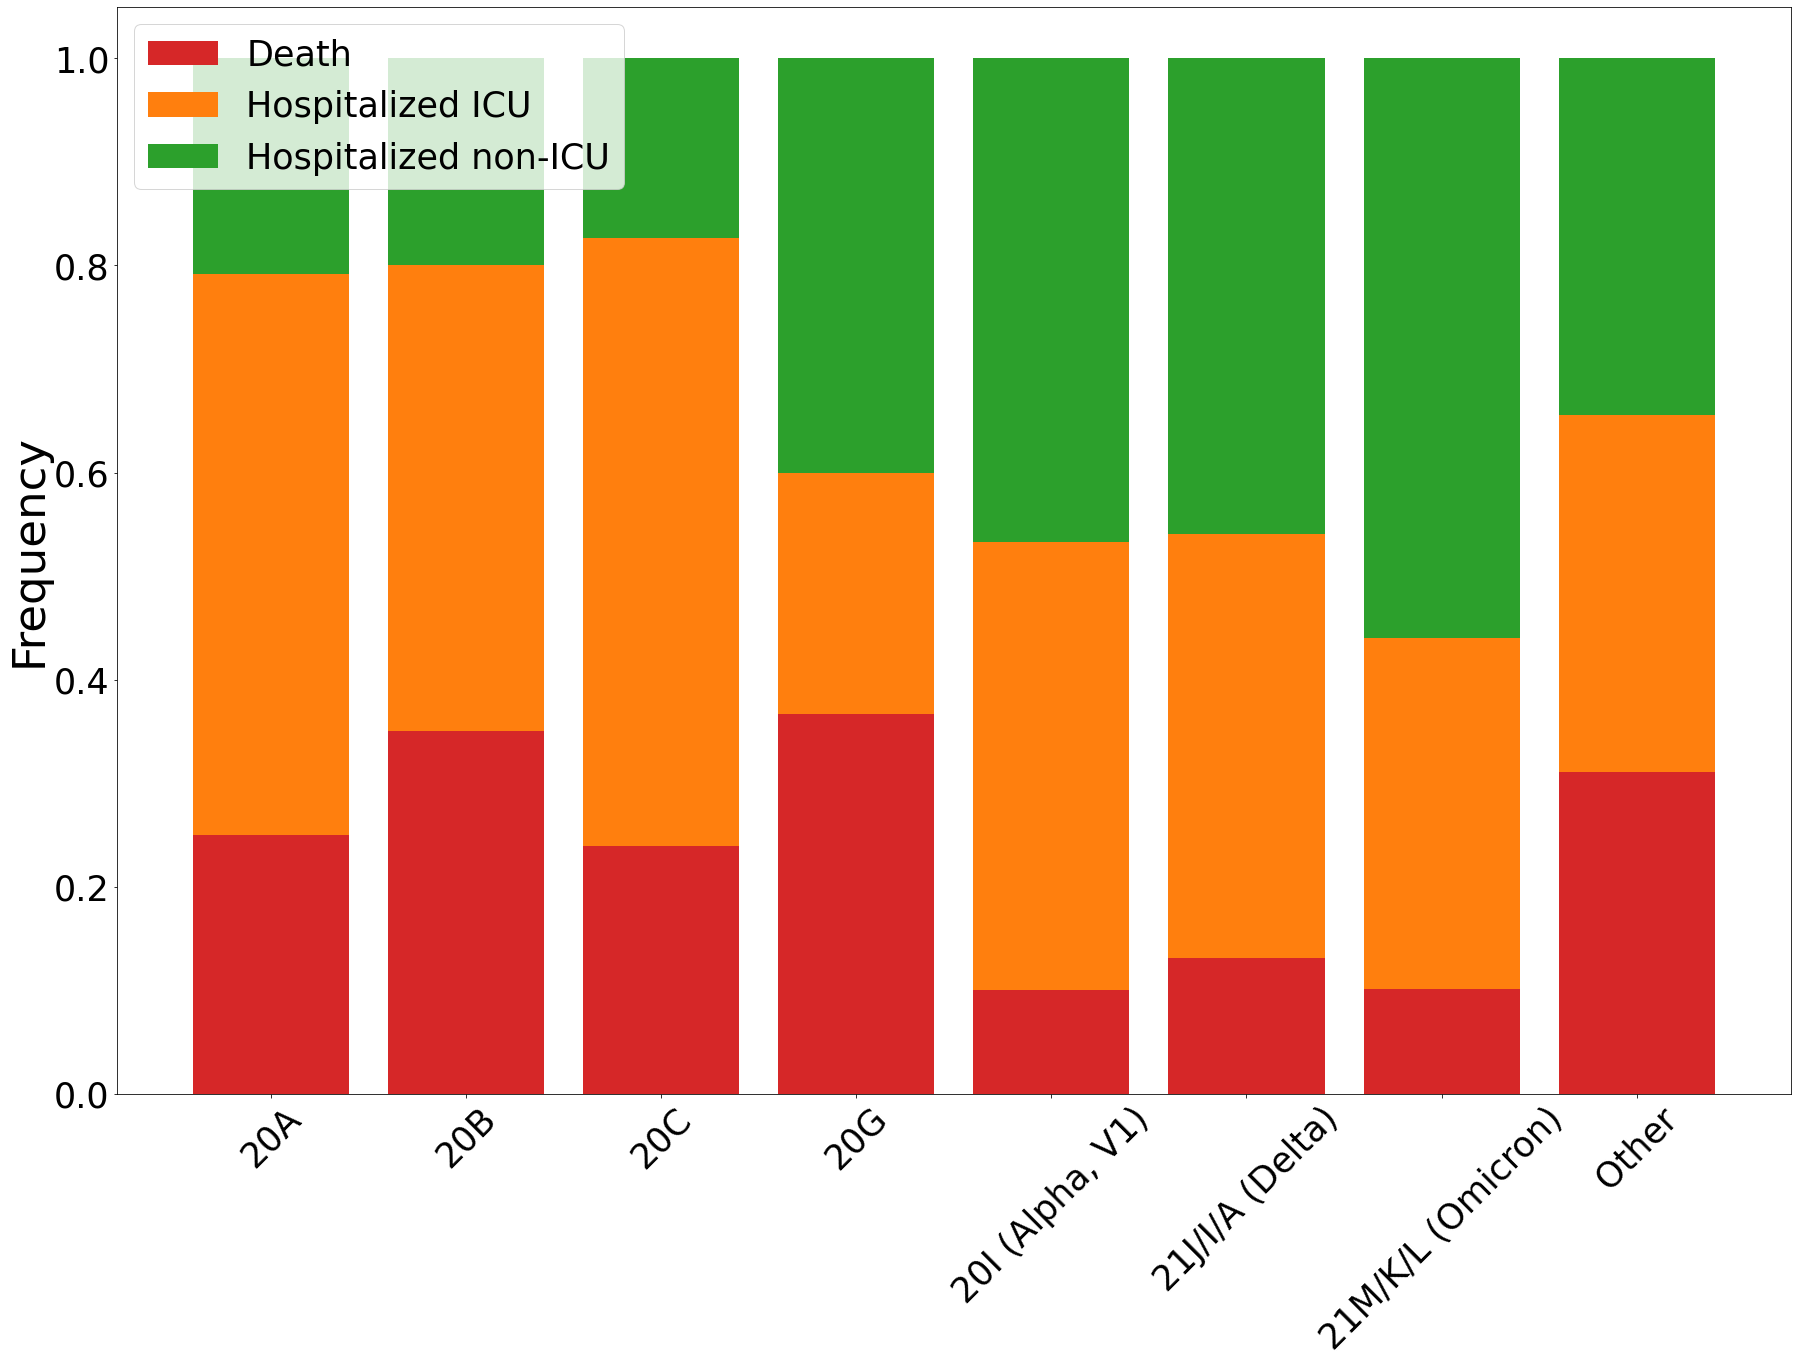

In [76]:
plt.figure(figsize = [30,20])
plt.tick_params(labelsize = 20)

bottom1 =np.add(freq_co_df['Death'], freq_co_df['Hospitalized ICU']).tolist()
bottom2 = np.add(bottom1, freq_co_df['Hospitalized non-ICU']).tolist()
plt.bar(freq_co_df['Clade'] , freq_co_df['Death'],  label='Death', color = 'tab:red')
plt.bar(freq_co_df['Clade'], freq_co_df['Hospitalized ICU'] , label='Hospitalized ICU', bottom = freq_co_df['Death'], color = 'tab:orange')

plt.bar(freq_co_df['Clade'], freq_co_df['Hospitalized non-ICU'] , label='Hospitalized non-ICU', bottom = bottom1, color = 'tab:green')
plt.xticks(fontsize = 35, rotation = 45)
plt.yticks(fontsize = 35)
plt.ylabel('Frequency', fontsize = 45)
plt.legend(fontsize = 35, loc = 2)
# plt.savefig('/Users/tlh4362/Desktop/fig3/fig3b.eps', format = 'eps', bbox_inches = 'tight')


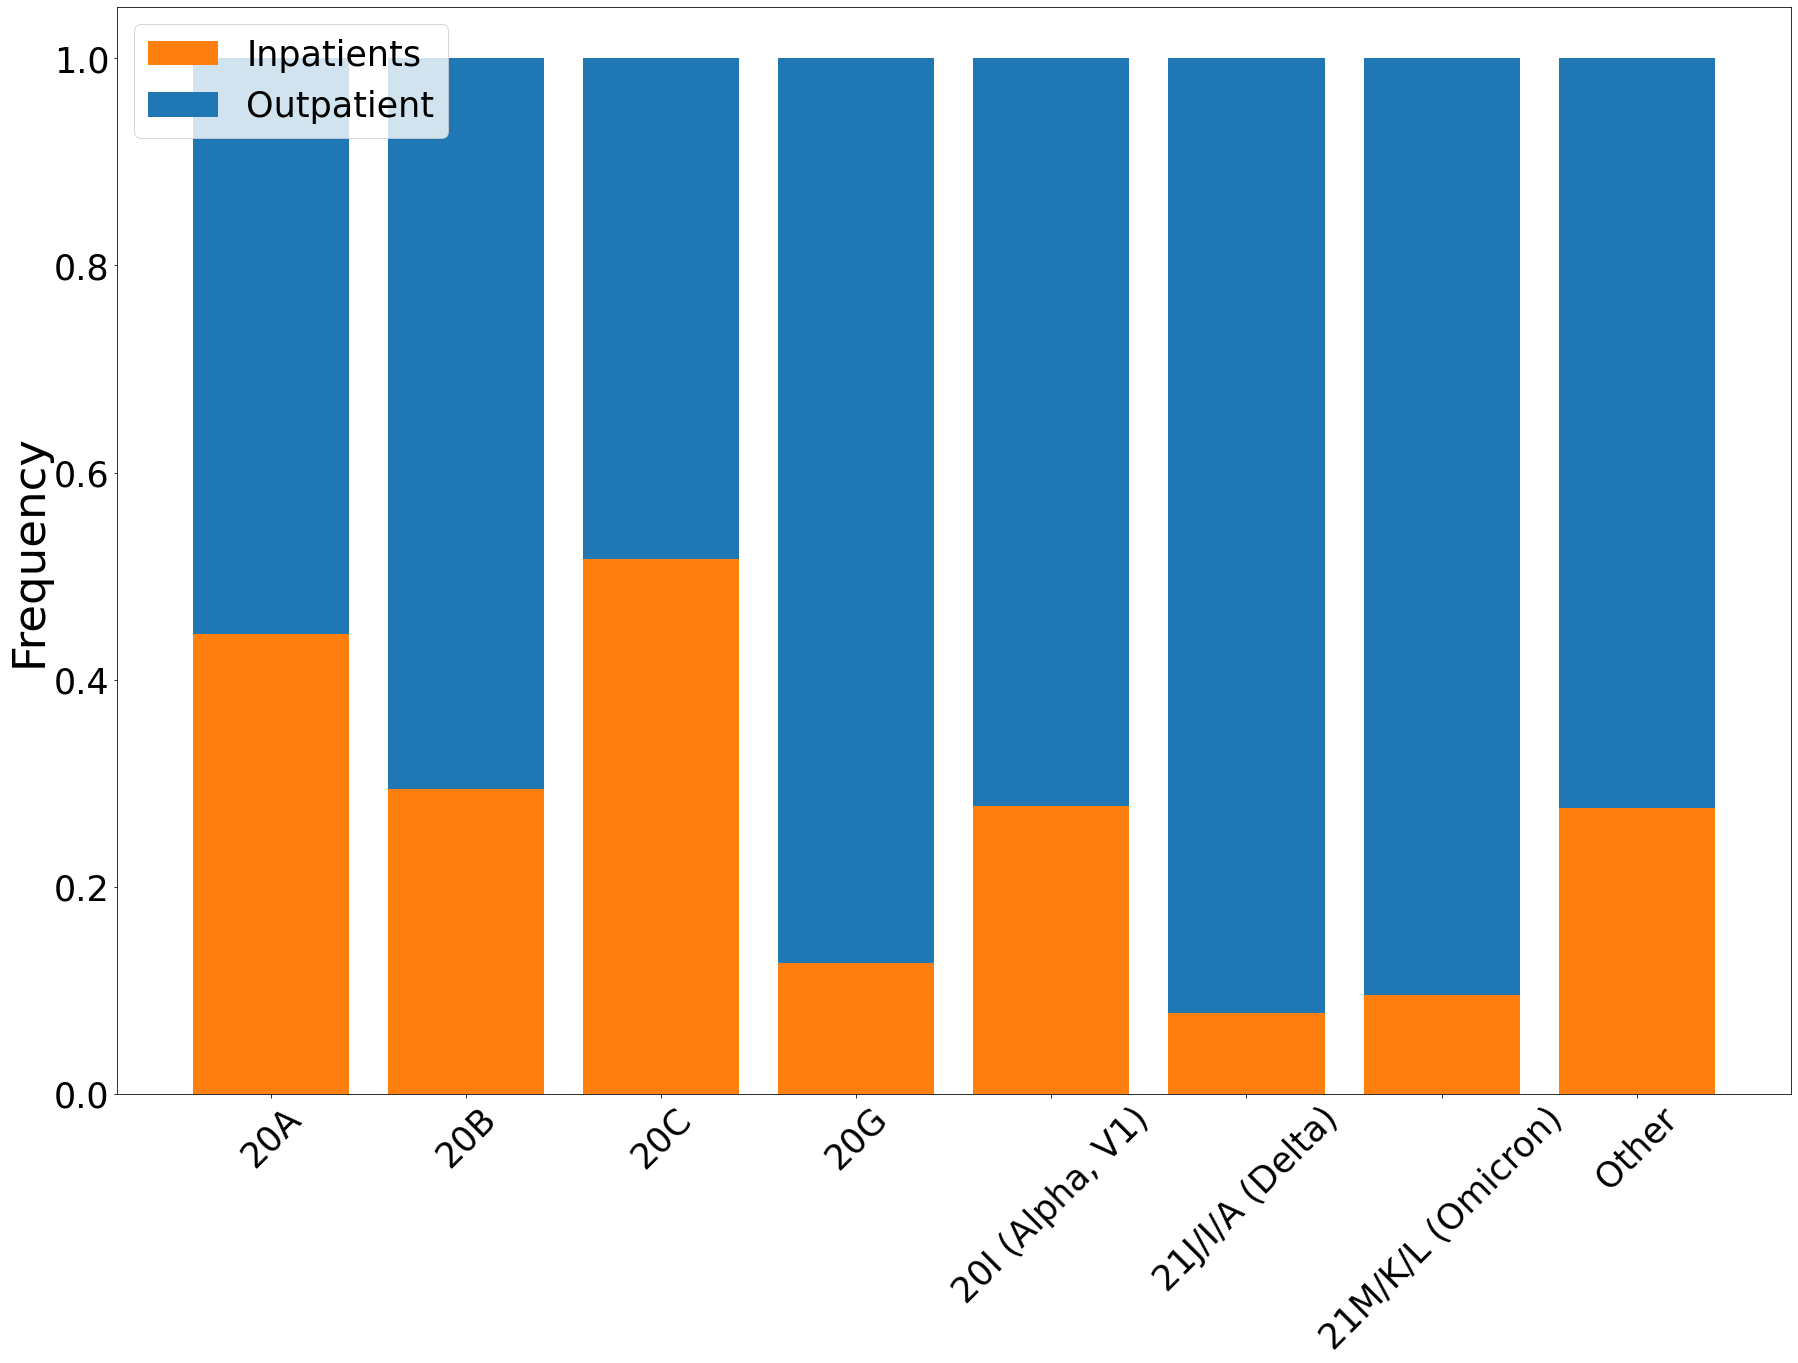

In [77]:
import matplotlib.gridspec as gridspec



bottom = [x + y + z for x, y, z in zip(death, inpt, icu)]
total = [x+y for x, y in zip(outpt, bottom)]
freq_bot = [x/y for x, y in zip(bottom, total)]
freq_top = [x/y for x, y in zip(outpt, total)]

plt.figure(figsize = [30, 20])
plt.bar(clades, freq_bot, label = 'Inpatients', color = 'tab:orange')
plt.bar(clades, freq_top, label = 'Outpatient', bottom = freq_bot, color = 'tab:blue')
plt.xticks(fontsize = 35, rotation = 45)
plt.yticks(fontsize = 35)
plt.ylabel('Frequency', fontsize = 45)
plt.legend(fontsize = 35, loc = 2)


# plt.savefig('/Users/tlh4362/Desktop/fig3/fig3a.eps', format = 'eps', bbox_inches = 'tight')

Optimization terminated successfully.
         Current function value: 0.338839
         Iterations 7
Index(['C(Clade, Treatment(reference="20A"))[T.20B]',
       'C(Clade, Treatment(reference="20A"))[T.20C]',
       'C(Clade, Treatment(reference="20A"))[T.20G]',
       'C(Clade, Treatment(reference="20A"))[T.20I (Alpha, V1)]',
       'C(Clade, Treatment(reference="20A"))[T.21J/I/A (Delta)]',
       'C(Clade, Treatment(reference="20A"))[T.21M/K/L (Omicron)]',
       'C(Clade, Treatment(reference="20A"))[T.Other]', 'Sex[T.Male]'],
      dtype='object')
Optimization terminated successfully.
         Current function value: 0.338839
         Iterations 7
Index(['C(Clade, Treatment(reference="Other"))[T.20A]',
       'C(Clade, Treatment(reference="Other"))[T.20B]',
       'C(Clade, Treatment(reference="Other"))[T.20C]',
       'C(Clade, Treatment(reference="Other"))[T.20G]',
       'C(Clade, Treatment(reference="Other"))[T.20I (Alpha, V1)]',
       'C(Clade, Treatment(reference="Other"))[T

<ipython-input-78-42dae821ab3c>:62: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrBr_r"))
  my_cmap.set_bad('white')
<ipython-input-78-42dae821ab3c>:63: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrBr_r"))
  my_cmap.set_over('lightgrey')


<AxesSubplot:>

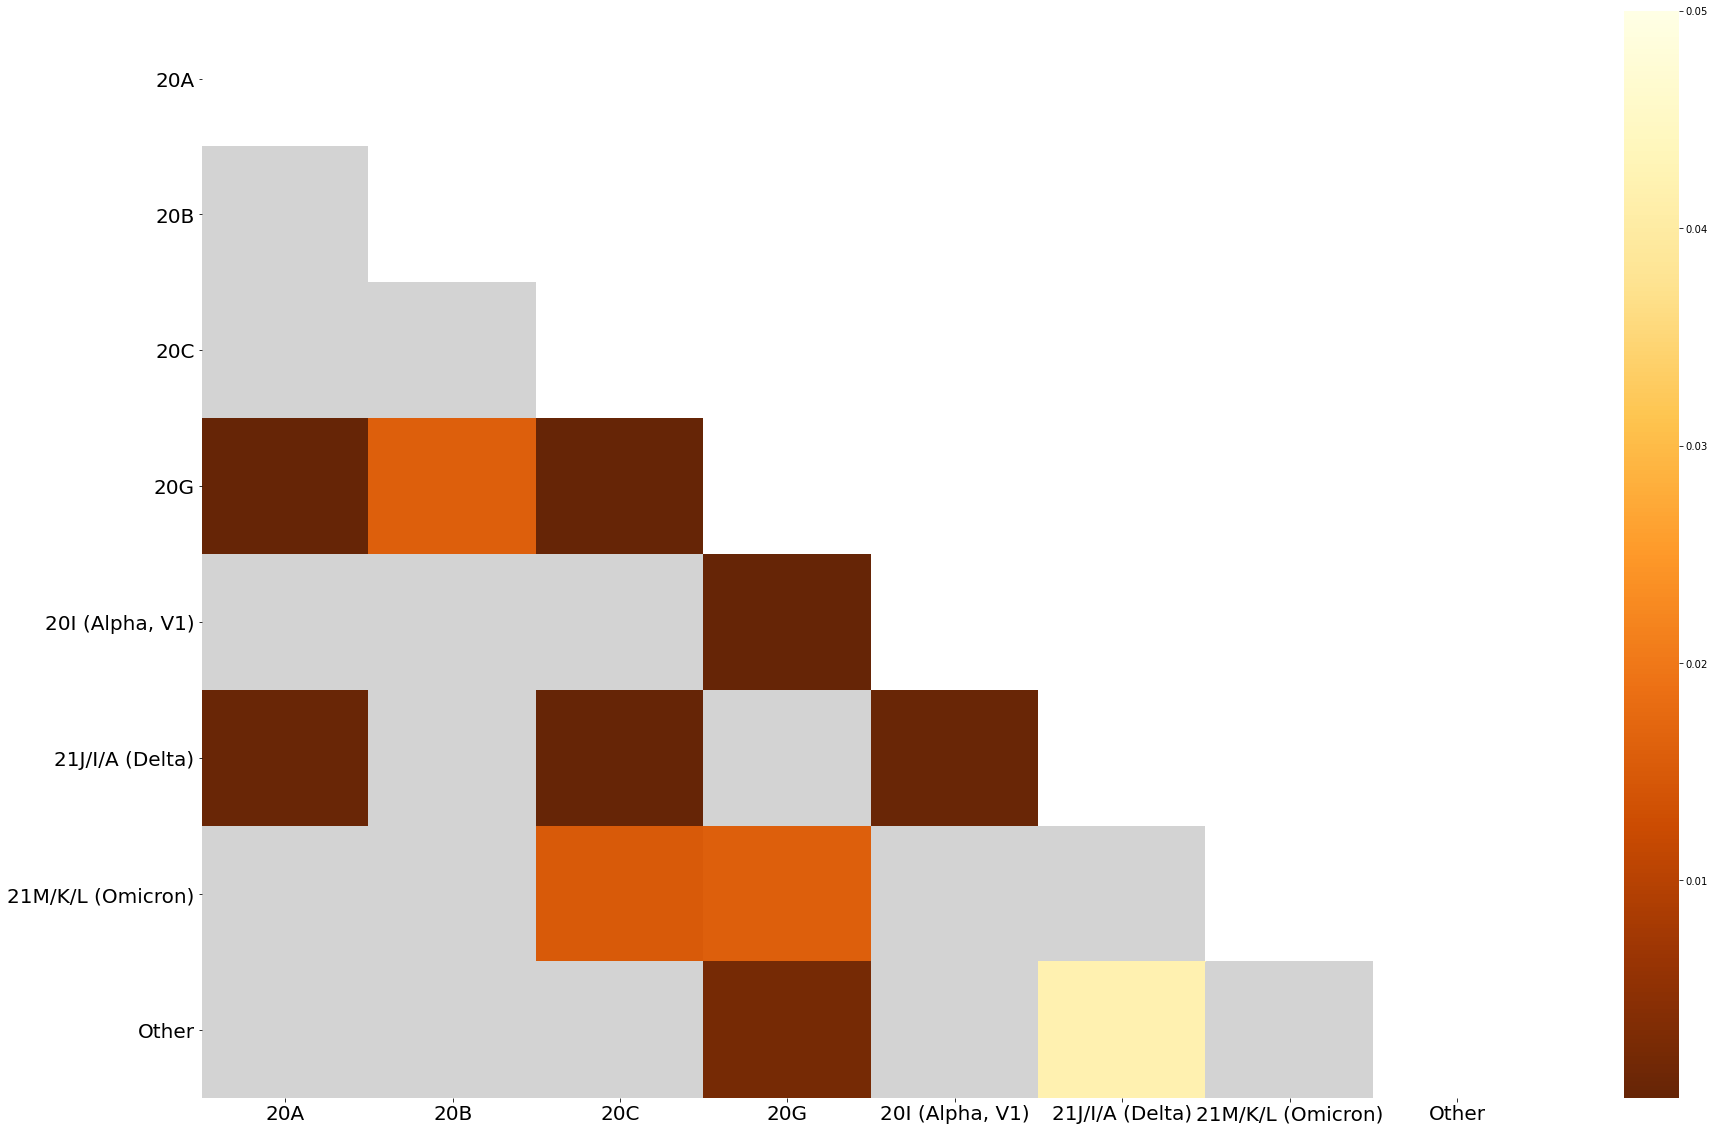

In [78]:
'''
To generate the heatmap, we first fit a multivariable logistic regression.
We then calculate the estimated marginal means from the model by setting each clade as the reference.
From the p-values obtained, we correct for FDR using Benjamini-Hochberg and plot the adjusted p-values in a heatmap
'''
emm_list = []
clade_list = []
pairwise_dict = {}
for clade in df['Clade'].unique():
    if isinstance(clade, float):
        next
    else:
        complete_formula = 'clinical_outcome~Age+C(Clade, Treatment(reference = "{clade}"))+Sex+C(Race, Treatment(reference = "White"))+Number_of_Comorbidities+BMI+Number_of_vaccination_doses_before_infection'.format(clade = clade)
        model = smf.logit(complete_formula, data = df)
        result = model.fit()
        emm = result.get_margeff(at = 'mean')
        pval = emm.summary_frame()['Pr(>|z|)'].iloc[0:8].values
        clade_pairs = emm.summary_frame()['Pr(>|z|)'].iloc[0:8].index
        print(clade_pairs)
        for i in range(len(clade_pairs)):
            pair = clade_pairs[i]
            clade1 = clade
            clade2 = pair.split("[T.")[-1].split(']')[0]
            value = pval[i]
            pairwise_dict['{}-{}'.format(clade1, clade2)] = value

    
ttest = result.t_test_pairwise('C(Clade, Treatment(reference="{clade}"))'.format(clade = clade), method = 'fdr_bh').result_frame['P>|z|']
new_pval_list = []
for pair,pval in zip(ttest.index, ttest.values):
    new_pval_list.append(pairwise_dict[pair])


emmfdr = pd.DataFrame()
emmfdr['pairs'] = ttest.index
fdr = statsmodels.stats.multitest.multipletests(new_pval_list, alpha = 0.05, method = 'fdr_bh')
emmfdr['pvals'] = new_pval_list
emmfdr['fdr_pvals'] = fdr[1]
emmfdr['fdr_results'] = fdr[0]

print(emmfdr.sort_values(by='fdr_pvals'))

heatmap_df = pd.DataFrame()

for i in range(len(emmfdr)):
    pair = emmfdr['pairs'].iloc[i]
    clade1 = pair.split('-')[0]
    clade2 = pair.split('-')[1]
    fdrpval = emmfdr['fdr_pvals'].iloc[i]
    heatmap_df.at[clade2, clade1] = fdrpval
    heatmap_df.at[clade1, clade2] = fdrpval
tmp = pd.DataFrame(np.tril(heatmap_df))
tmp.index = heatmap_df.index
tmp.columns = heatmap_df.columns
tmp[tmp == 0] = None

tmp = tmp.loc[['20A', '20B', '20C', '20G', '20I (Alpha, V1)', '21J/I/A (Delta)', '21M/K/L (Omicron)', 'Other'], ['20A', '20B', '20C', '20G', '20I (Alpha, V1)', '21J/I/A (Delta)', '21M/K/L (Omicron)', 'Other']]


matrix = np.triu(tmp)

my_cmap = sns.color_palette("YlOrBr_r", as_cmap=True)
my_cmap.set_bad('white')
my_cmap.set_over('lightgrey')
plt.figure(figsize = [30,20])
plt.tick_params(labelsize=20)

sns.heatmap(tmp, mask = matrix, cmap = my_cmap, vmax = 0.05)

# plt.savefig('/Users/tlh4362/Desktop/fig3/fig3d.eps', format = 'eps', bbox_inches = 'tight')

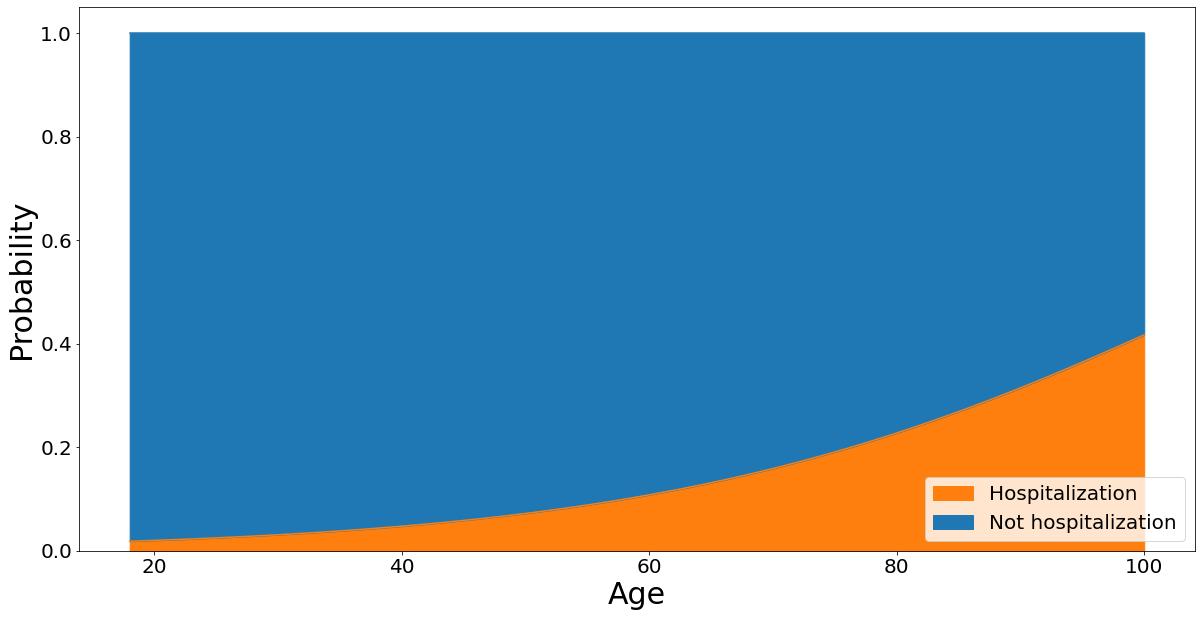

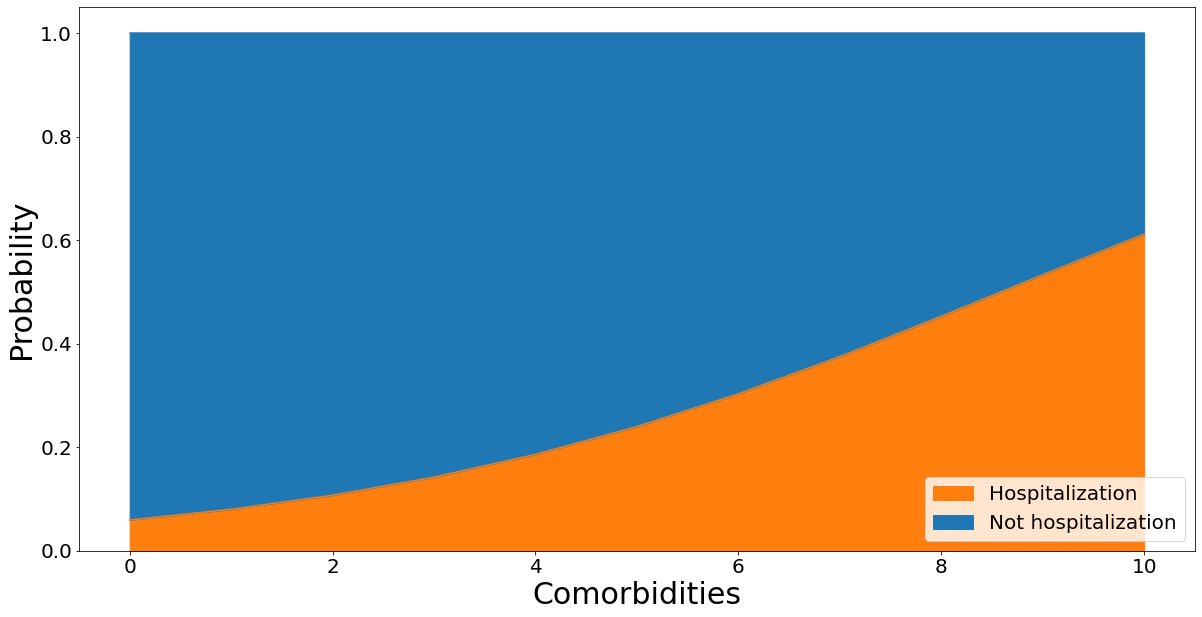

In [79]:
'''
to visualize the effect of age and comorbidities, we fix the model to the mode or mean of the variables and adjust 
age and comorbidites to see the probability distribution of hospitalization.

'''

age_prob = pd.DataFrame()


age_list = list(np.arange(18, 101, 1))

for age in age_list:
    tmp = pd.DataFrame().from_dict({
                                    'Clade':['21J/I/A (Delta)'], 
                                    'Sex' : ['Female'],
                                    'Race':['White'], 
                                    'Age' : [age], #45.32
                                    'Number_of_Comorbidities': [0],
                                    'BMI' : [28.15],
                                    'Number_of_vaccination_doses_before_infection':[0],
                                                                       })
    age_prob = age_prob.append(tmp, ignore_index = True)
plot_df = pd.DataFrame()
prob = result.predict(age_prob).values
non_hosp = 1-prob
fig, ax = plt.subplots(figsize = [20,10])
plot_df['Hospitalization'] = prob
plot_df['Not hospitalization'] = non_hosp
plot_df.index = age_list
plot_df.plot(kind = 'area', ax = ax, color={'Hospitalization':'tab:orange', 'Not hospitalization':'tab:blue'})
ax.set_xlabel('Age', fontsize = 30)
ax.set_ylabel('Probability', fontsize = 30)
ax.tick_params(labelsize = 20)
ax.legend(fontsize = 20)
# plt.savefig('/Users/tlh4362/Desktop/fig3/fig3e-1.eps', format = 'eps', bbox_inches = 'tight')
# sns.set_theme()
plt.show()
plt.close()
    
    
comor_prob = pd.DataFrame()


comor_list = list(np.arange(0, 11, 1))

for comor in comor_list:
    tmp = pd.DataFrame().from_dict({
                                    'Clade':['21J/I/A (Delta)'], 
                                    'Sex' : ['Female'],
                                    'Race':['White'], 
                                    'Age' : [45.32], #45.32
                                    'Number_of_Comorbidities': [comor], #0
                                    'BMI' : [28.15],
                                    'Number_of_vaccination_doses_before_infection':[0],
                                                                       })
    comor_prob = comor_prob.append(tmp, ignore_index = True)
plot_df = pd.DataFrame()
prob = result.predict(comor_prob).values
non_hosp = 1-prob
fig, ax = plt.subplots(figsize = [20,10])
plot_df['Hospitalization'] = prob
plot_df['Not hospitalization'] = non_hosp
plot_df.index = comor_list
plot_df.plot(kind = 'area', ax = ax, color={'Hospitalization':'tab:orange', 'Not hospitalization':'tab:blue'})
ax.set_xlabel('Comorbidities', fontsize = 30)
ax.set_ylabel('Probability', fontsize = 30)
ax.tick_params(labelsize = 20)
ax.legend(fontsize = 20)
# plt.savefig('/Users/tlh4362/Desktop/fig3/fig3e-2.eps', format = 'eps', bbox_inches = 'tight')
# sns.set_theme()
plt.show()
plt.close()
    